In [286]:
import numpy as np
import pandas as pd
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

### Zadanie 2

Sprawdź: 
* ile jest wszystkich próbek z zbiorze, 
* ile jest próbek w poszczegónych klasach.

Czy zauważyłeś jakieś problemy związane z tym zbiorem danych?

In [304]:
print(f'Próbek w zbiorze danych jest {train.shape[0] + test.shape[0]}')
train = pd.DataFrame(train)
test = pd.DataFrame(test)
print(train[0].value_counts() + test[0].value_counts())

Próbek w zbiorze danych jest 3740
1.0     132
2.0     110
3.0     110
4.0      88
5.0     132
6.0      88
7.0     110
8.0     121
9.0     154
10.0    143
11.0    176
12.0    132
13.0    143
14.0    132
15.0    110
22.0    132
23.0    121
24.0    143
25.0     99
26.0    132
27.0    121
28.0    132
29.0    132
30.0    132
31.0    121
32.0    121
33.0    121
34.0    121
35.0    121
36.0    110
Name: 0, dtype: int64


### Zadanie 3

Wybierz wiersze należące do poniższych klas (rodzaje liści) i zapisz w zmiennej `data`:
* `Populus nigra` - klasa nr 3, 
* `Quercus robur` - klasa nr 5.

Aby wybrać jedynie te wiersze, które należą do wymienionych klas, należy przefiltrować dane po kolumnie o indeksie `0`:


In [305]:
treningowy = train[(train[0] == 3.0) | (train[0] == (5.0))]
testowy = test[(test[0]==(3.0)) | (test[0]==(5.0))]
treningowy3 = train[train[0] == (3.0)]
treningowy5 = train[train[0] == (5.0)]

### Zadanie 4

Podziel zbiór `data` na dwa zbiory:
* testowy (25%) - zapisz w zmiennej `test` (zbiór używany TYLKO do testowania klasyfikatora),
* treningowy (75%) - zapisz w zmiennej `train`.

> Podpowiedź: Możesz zastosować metodę `train_test_split` z biblioteki scikit-learn.

nie robimy

### Zadanie 5

A) Wybierz dwie dowolne cechy (*features*), np. o indeksach 4 i 8.<br />
B) Przedstaw graficznie próbki - na osi X i Y wartości wybranych cech.

Poniższy kod importuje kolekcję funkcji przydatnych do wizualizacji z biblioteki `matplotlib` (*info: zwróć uwagę, że nadano alias `plt`*).
```python

```

Możesz wykorzystać funkcje `plt.figure`, `plt.scatter`, `plt.legend`, `plt.title`, `plt.xlabel` i `plt.ylabel` w celu wykonania tego zadania.

Scatter: <https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html>

>Ważne: Pamiętaj, że każdy przedstawiony wykres powinien być czytelny i posiadać następujące elementy:
* tytuł,
* opisy wszystkich osi,
* legendę.

> **Przykład**:
```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 1")
plt.ylabel(f"Cecha 2")
samples = np.random.rand(2, 20, 2)
samples[0] = samples[0]-0.5
samples[1] = samples[1]+0.5
for idx, sample in enumerate(samples):
    plt.scatter(x=sample[:, 0], y=sample[:, 1], label=idx)
plt.legend()
```
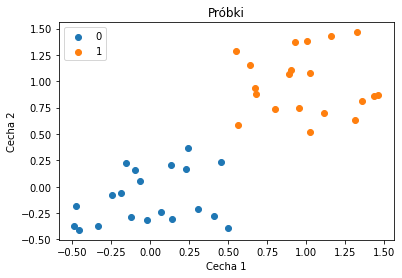

Dodatkowe zasoby:
* `pyplot`: <https://matplotlib.org/tutorials/introductory/pyplot.html>

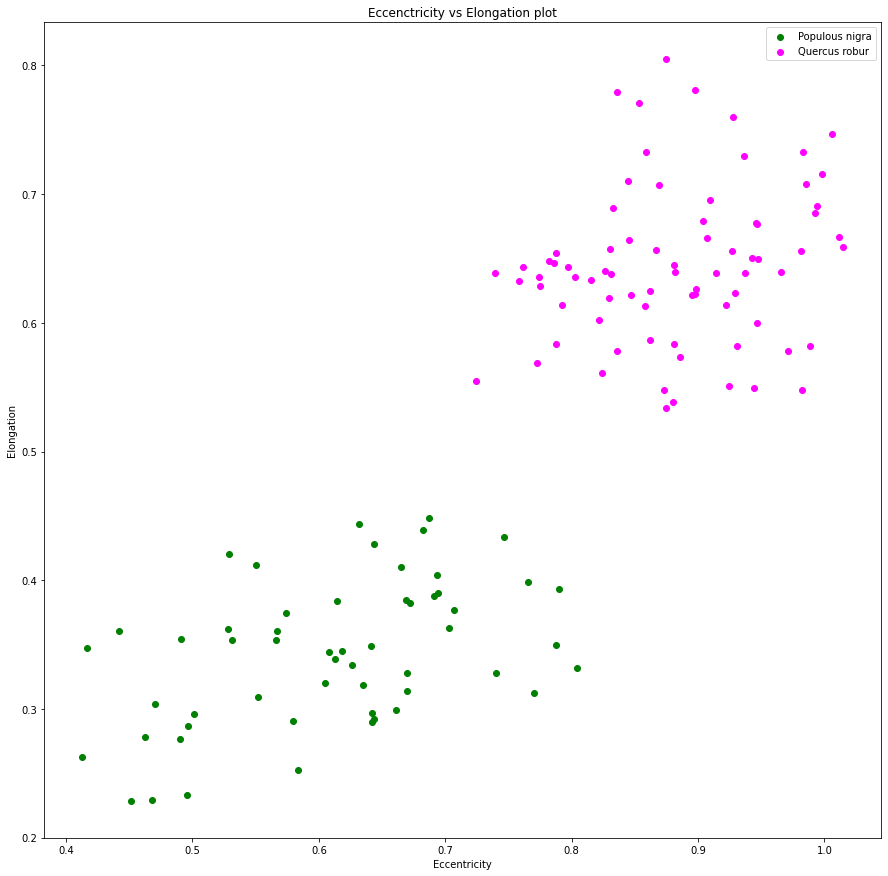

In [289]:
import matplotlib.pyplot as plt
cechytestowe3 = treningowy3.loc[:, [0, 2, 4]]
cechytestowe5 = treningowy5.loc[:, [0, 2, 4]]
plt.figure()
plt.scatter(cechytestowe3[2], cechytestowe3[4], color = 'green', label='Populous nigra')
plt.scatter(cechytestowe5[2], cechytestowe5[4], color ='magenta', label='Quercus robur')
plt.title('Eccenctricity vs Elongation plot')
plt.xlabel('Eccentricity')
plt.ylabel('Elongation')
plt.legend()
plt.show()

### Zadanie 6

Zaimplementuj funkcję `edist`, która zwróci _odległość Euklidesa_ pomiędzy punktem `p1` oraz `p2` uwzględniający wybrane cechy `features`.

$$
d(x, y) = \sqrt{\sum^{n-1}_{i=0}{(x_i - y_i)^2}}
$$

In [290]:
features = [1, 2] # kolumny o indeksach 1, 2
p1 = [0, 2, 3]
p2 = [0, 5, 6]

def edist(p1, p2, features):
    distance = ((p1[features[0]]-p2[features[0]])**2+(p1[features[1]]-p2[features[1]])**2)**(1/2)
    return distance

edist(p1, p2, features) # 4.242640687119285

4.242640687119285

### Zadanie 7

Zaimplementuj klasyfikator najbliższego sąsiada. 
1. Oblicz odległość każdego elementu ze zbioru `test` do każdego elementu ze zbioru `train`. 
2. Odnajdź taki element ze zbioru `train`, którego odległość do klasyfikowanego elementu jest najmniejsza.
3. Przypisz klasyfikowanego elementowi klasę.


In [291]:
testowy = testowy.loc[:, [0, 2, 4]]
testowy['Observed class'] = None
testowy.rename(columns={0:'Class'}, inplace=True)
treningowy = treningowy.loc[:, [0, 2, 4]]
for i in range(len(testowy.iloc[:])):
    distancebest = 100
    for j in range(len(treningowy.iloc[:])):
        currenttest = [i,j]
        distance = edist(testowy.values[i], treningowy.values[j], [1,2])
        if distance < distancebest:
            distancebest = distance
            testowy.iloc[i,3] = treningowy.iloc[j,0]
testowy

,Class,2,4,Observed class
10,3.0,0.612890,0.331170,3.0
31,3.0,0.595710,0.325920,3.0
68,5.0,0.822680,0.599090,5.0
75,5.0,0.936130,0.671750,5.0
76,5.0,0.894930,0.649250,5.0
...,...,...,...,...
1440,3.0,0.638268,0.415194,3.0
1446,3.0,0.716864,0.411318,3.0
1466,5.0,0.886221,0.573496,5.0
1468,5.0,0.924960,0.575877,5.0


### Zadanie 8
Wyświetl wyniki klasyfikacji (próbki treningowe i testowe), każdą klasę w innym kolorze, a próbki testowe innym "markerem".

> Wykorzystaj parametry: `facecolors`, `edgecolors`, `marker` i `c` funkcji `scatter`.

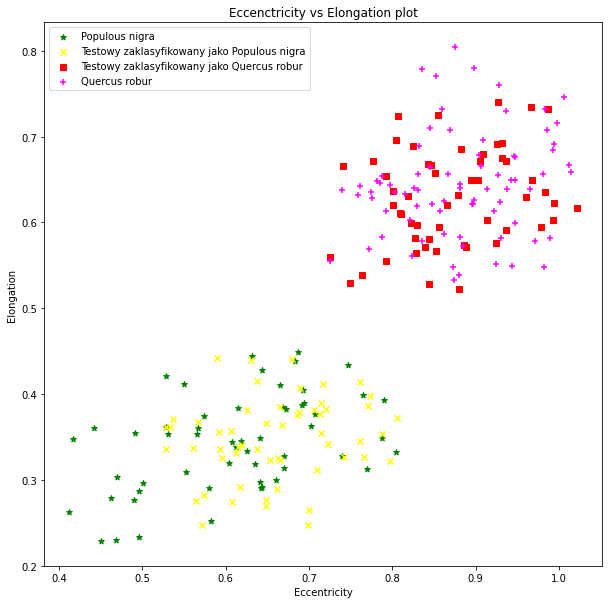

In [292]:
testowy3 = testowy[(testowy['Observed class']==(3.0))]
testowy5 = testowy[(testowy['Observed class']==(5.0))]
plt.rcParams["figure.figsize"] = (10, 10)
plt.figure()
plt.scatter(cechytestowe3[2], cechytestowe3[4], color = 'green', label='Populous nigra', marker='*')
# plt.scatter(testowy[2], testowy[4], color='yellow', label='Zbiór testowy', marker='x')
plt.scatter(testowy3[2], testowy3[4], color='yellow', label='Testowy zaklasyfikowany jako Populous nigra', marker='x')
plt.scatter(testowy5[2], testowy5[4], color='red', label='Testowy zaklasyfikowany jako Quercus robur', marker='s')
plt.scatter(cechytestowe5[2], cechytestowe5[4], color ='magenta', label='Quercus robur', marker='+')
plt.title('Eccenctricity vs Elongation plot')
plt.xlabel('Eccentricity')
plt.ylabel('Elongation')
plt.legend()
plt.show()

### Zadanie 9

Oblicz dokładność (*Accuracy*) klasyfikacji (stosunek poprawnie zaklasyfikowanych próbek do liczby wszystkich próbek wyrażony procentowo).

$$
\texttt{Accuracy} = \frac{T}{N}
$$

gdzie $T$ - liczba poprawnie zaklasyfikowanych próbek, $N$ - liczba wszystkich próbek.


In [293]:
score = 0
for i in range(len(testowy.values)):
    if testowy.values[i][0] == testowy.values[i][3]:
        score += 1
print(f' Accuracy is {score/len(testowy.values)}')

 Accuracy is 1.0


### Zadanie 10

Wybierz 5 dowolnych rodzajów liści (klasy) i przeprowadź eksperyment ponownie.

> Możesz połączyć wszystkie powyższe fragmenty doku w wkleić w komórkę poniżej zmieniając liczbę klas.

In [294]:
treningowy = train[(train[0]==(4.0)) | (train[0]==(6.0)) | (train[0]==(15.0)) | (train[0]==(18.0)) | (train[0]==(21.0))]
testowy = test[(test[0]==(4.0)) | (test[0]==(6.0)) | (test[0]==(15.0)) | (test[0]==(18.0)) | (test[0]==(21.0))]

treningowy4 = train[train[0] == (4.0)]
treningowy6 = train[train[0] == (6.0)]
treningowy15 = train[train[0] == (15.0)]
treningowy18 = train[train[0] == (18.0)]
treningowy21 = train[train[0] == (21.0)]
cechytestowe4 = treningowy4.loc[:, [0, 2, 4]]
cechytestowe6 = treningowy6.loc[:, [0, 2, 4]]
cechytestowe15 = treningowy15.loc[:, [0, 2, 4]]
cechytestowe18 = treningowy18.loc[:, [0, 2, 4]]
cechytestowe21 = treningowy21.loc[:, [0, 2, 4]]
testowy = testowy.loc[:, [0, 2, 4]]
treningowy = treningowy.loc[:, [0, 2, 4]]
testowy['Observed class'] = None
testowy.rename(columns={0:'Class'}, inplace=True)

for i in range(len(testowy.iloc[:])):
    distancebest = 100
    for j in range(len(treningowy.iloc[:])):
        currenttest = [i,j]
        distance = edist(testowy.values[i], treningowy.values[j], [1,2])
        if distance < distancebest:
            distancebest = distance
            testowy.iloc[i,3] = treningowy.iloc[j,0]

testowy4 = testowy[(testowy['Observed class']==(4.0))]
testowy6 = testowy[(testowy['Observed class']==(6.0))]
testowy15 = testowy[(testowy['Observed class']==(15.0))]
testowy18 = testowy[(testowy['Observed class']==(18.0))]
testowy21 = testowy[(testowy['Observed class']==(21.0))]

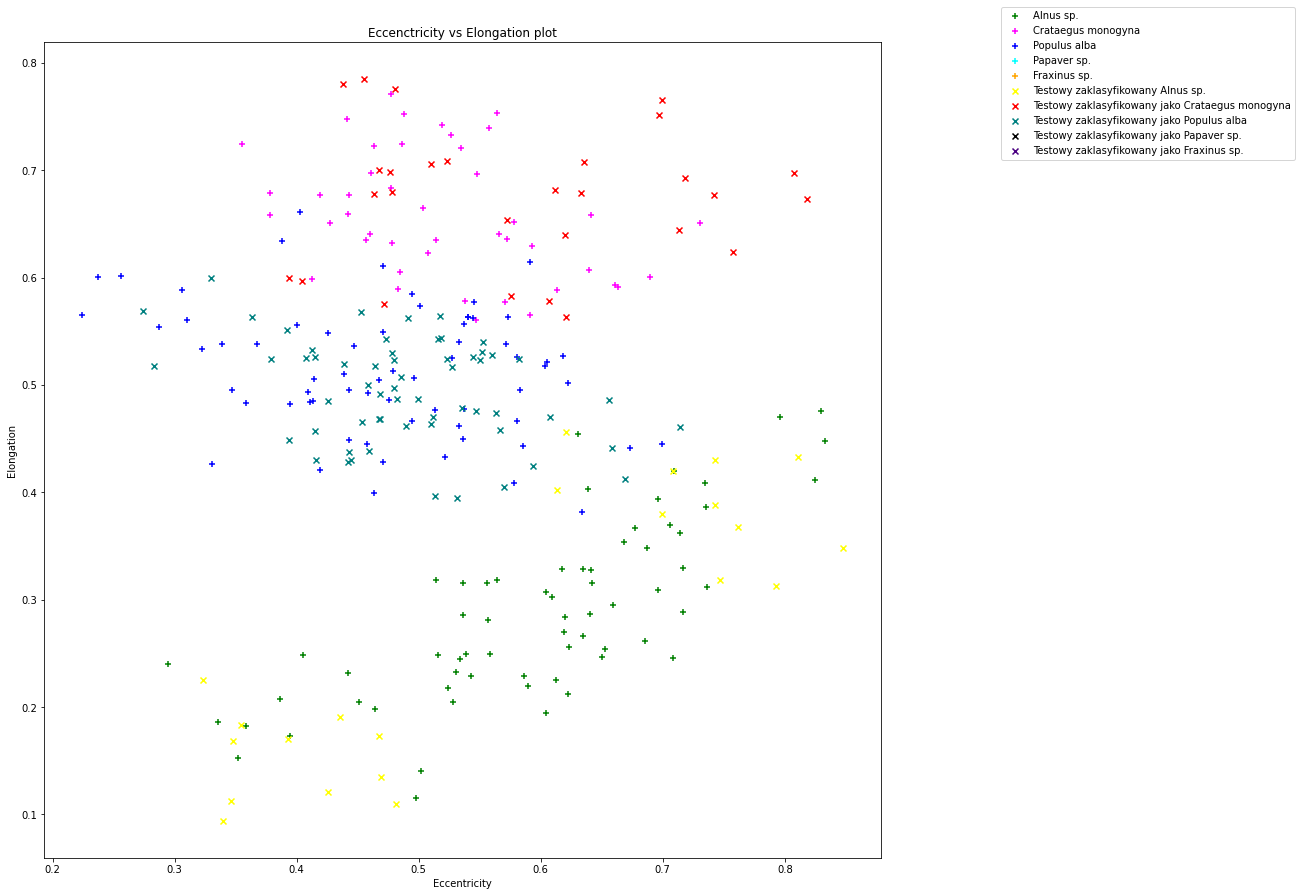

In [263]:
plt.rcParams["figure.figsize"] = (15, 15)
plt.figure()
plt.scatter(cechytestowe4[2], cechytestowe4[4], color = 'green', label='Alnus sp.', marker='+')
plt.scatter(cechytestowe6[2], cechytestowe6[4], color ='magenta', label='Crataegus monogyna', marker='+')
plt.scatter(cechytestowe15[2], cechytestowe15[4], color ='blue', label='Populus alba', marker='+')
plt.scatter(cechytestowe18[2], cechytestowe18[4], color ='cyan', label='Papaver sp.', marker='+')
plt.scatter(cechytestowe21[2], cechytestowe21[4], color ='orange', label='Fraxinus sp.', marker='+')
plt.scatter(testowy4[2], testowy4[4], color='yellow', label='Testowy zaklasyfikowany Alnus sp.', marker='x')
plt.scatter(testowy6[2], testowy6[4], color='red', label='Testowy zaklasyfikowany jako Crataegus monogyna', marker='x')
plt.scatter(testowy15[2], testowy15[4], color='teal', label='Testowy zaklasyfikowany jako Populus alba', marker='x')
plt.scatter(testowy18[2], testowy18[4], color='black', label='Testowy zaklasyfikowany jako Papaver sp.', marker='x')
plt.scatter(testowy21[2], testowy21[4], color='indigo', label='Testowy zaklasyfikowany jako Fraxinus sp.', marker='x')
plt.title('Eccenctricity vs Elongation plot')
plt.xlabel('Eccentricity')
plt.ylabel('Elongation')
plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.show()

In [268]:
score = 0
for i in range(len(testowy.values)):
    if testowy.values[i][0] == testowy.values[i][3]:
        score += 1
print(f' Accuracy is {round((score/len(testowy.values)),3)}')

 Accuracy is 0.791


### Zadanie 11

Przeprowadź eksperyment ponownie dla większej liczby cech.

In [301]:
features = [0, 3, 6, 8, 9, 10, 13, 14]
treningowy = train[(train[0]==(4.0)) | (train[0]==(6.0)) | (train[0]==(15.0)) | (train[0]==(18.0)) | (train[0]==(21.0))]
testowy = test[(test[0]==(4.0)) | (test[0]==(6.0)) | (test[0]==(15.0)) | (test[0]==(18.0)) | (test[0]==(21.0))]

def edist(p1, p2, features):
    distance = ((p1[features[0]]-p2[features[0]])**2+
                (p1[features[1]]-p2[features[1]])**2+
                (p1[features[2]]-p2[features[2]])**2+
                (p1[features[3]]-p2[features[3]])**2+
                (p1[features[4]]-p2[features[4]])**2+
                (p1[features[5]]-p2[features[5]])**2+
                (p1[features[6]]-p2[features[6]])**2)**(1/2)
    return distance

testowy = testowy.loc[:, features]
treningowy = treningowy.loc[:, features]
testowy['Observed class'] = None
testowy.rename(columns={0:'Class'}, inplace=True)
for i in range(len(testowy.iloc[:])):
    distancebest = 100
    for j in range(len(treningowy.iloc[:])):
        currenttest = [i,j]
        distance = edist(testowy.values[i], treningowy.values[j], range(1,len(features)))
        if distance < distancebest:
            distancebest = distance
            testowy.iloc[i,len(features)] = treningowy.iloc[j,0]
testowy

,Class,3,6,8,9,10,13,14,Observed class
24,6.0,1.206700,0.564910,0.112640,2.309300,0.021181,0.002032,0.000066,6.0
27,4.0,1.552900,0.994740,0.012904,0.030306,0.020679,0.000795,0.000268,4.0
51,6.0,1.041900,0.842110,0.114380,2.381100,0.025400,0.001798,0.000122,6.0
52,15.0,1.073800,0.854390,0.065312,0.776350,0.067161,0.005958,0.000406,15.0
67,6.0,1.103200,0.819300,0.115470,2.426800,0.006859,0.000476,0.000014,6.0
...,...,...,...,...,...,...,...,...,...
1429,4.0,1.051229,0.958002,0.013203,0.095598,0.018852,0.001024,0.000146,4.0
1430,15.0,1.438653,1.031624,0.067990,0.811159,0.108117,0.009368,0.000750,15.0
1441,15.0,1.282437,0.887241,0.073508,1.039690,0.103021,0.010790,0.000715,15.0
1455,15.0,0.955213,0.988602,0.073531,1.056086,0.077586,0.010836,0.000353,15.0


In [302]:
score = 0
for i in range(len(testowy.values)):
    if testowy.values[i][0] == testowy.values[i][len(features)]:
        score += 1
print(f' Accuracy is {round((score/len(testowy.values)),3)}')

 Accuracy is 0.9


### Zadanie 12

Napisz wnioski z przeprowadzonego eksperymentu.

Algorytm najbliższego sąsiada opierający się na prostym obliczaniu odległości Euklidesa pomiędzy punktami danych jest szybkim, optymalnym narzędziem do klasyfikacji danych. W pierwszej części ćwiczenia widać było prosty przypadek klasyfikacji dwóch klas według dwóch cech, gdzie z powodu optymalnego doboru cech klasyfikacja osiągnęła dokładność rzędu 100%. W kolejnej części ćwiczenia przy doborze 5 klas i 2 cechach dokładność spadła do 79%, ponieważ dwie cechy nie wystarczyły, żeby poprawnie oddzielić 5 klas, których próbki charakteryzowały się cechami zbliżonymi. Jednak po zwiększeniu liczby cech branych pod uwagę w algorytmie do 7 dokładność wyniosła 90%, co jest wynikiem co najmniej zadowalającym. Świadczy to o tym, że im więcej cech branych jest pod uwagę w algorytmie najbliższego sąsiada, tym lepsza jest dokładność predykcji jego klasyfikacji, a zwiększanie liczby klas branych pod uwagę może powodować jej zmniejszenie.